In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import add_dummy_feature

## Perceptron-like implementation of Logistic Regression

In [3]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

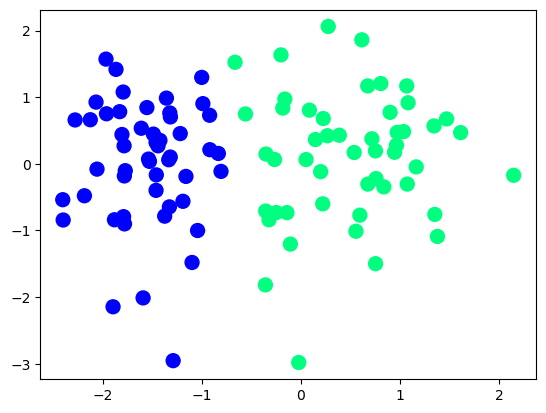

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.show()

In [5]:
class LogisticReg:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X = add_dummy_feature(X)
        self.coef_ = np.ones(X.shape[1])
        
        for _ in range(self.epochs):
            j = np.random.randint(X.shape[0])
            y_hat = LogisticReg.step(np.dot(X[j], self.coef_))
            self.coef_ = self.coef_ + (self.lr * (y[j]-y_hat) * X[j])

    def step(i):
        return 1 if i>0 else 0

In [6]:
log_reg = LogisticReg(epochs=1000, learning_rate=0.1)
log_reg.fit(X, y)

In [7]:
print(log_reg.coef_)
m = - (log_reg.coef_[1]/log_reg.coef_[2])
b = - (log_reg.coef_[0]/log_reg.coef_[2])

[1.         1.40031191 0.12710784]


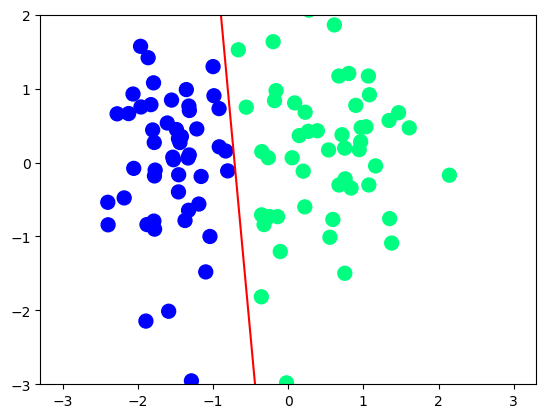

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.plot(x_input, y_input, 'r-')
plt.ylim(-3,2)
plt.show()

### But why isn't our model preferred over the sklearn model?
If we increase the separation in the dataset:

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

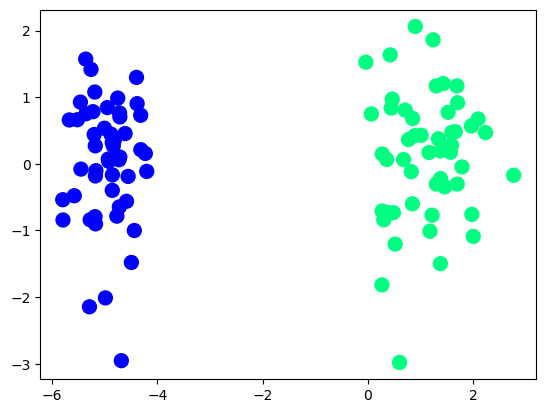

In [10]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap="winter", s=100)

Now, as we can see, the data is separated more, compared to the previous dataset (above)  
Let's train our model and see the results

In [28]:
log_reg = LogisticReg(epochs=100, learning_rate=0.01)
log_reg.fit(X, y)

In [29]:
m = - (log_reg.coef_[1]/log_reg.coef_[2])
b = - (log_reg.coef_[0]/log_reg.coef_[2])

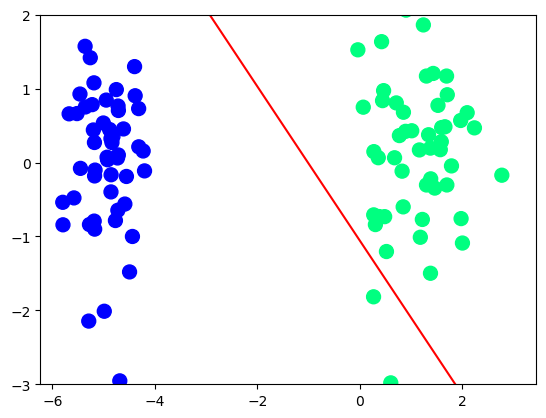

In [30]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.plot(x_input, y_input, 'r-')
plt.ylim(-3,2)
plt.show()

The line is inclined towards one of the classes and doesn't give a good solution

Let's train the sklearn model and see the difference

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [34]:
lr.coef_, lr.intercept_

(array([[1.77255101, 0.01190507]]), array([3.54700273]))

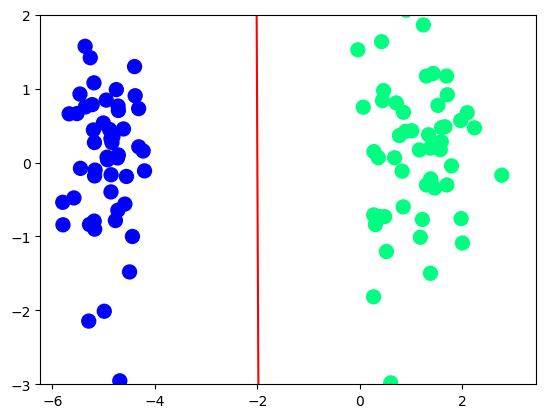

In [42]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.plot(x_input, y_input, 'r-')
plt.ylim(-3,2)
plt.show()

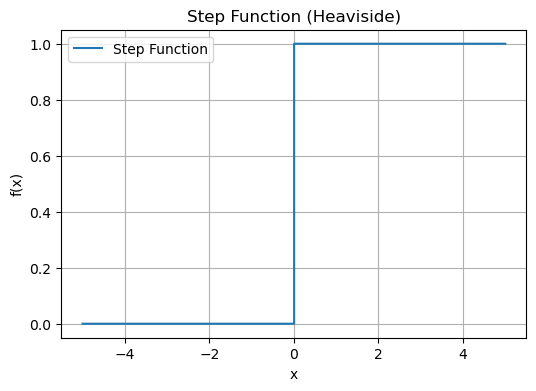

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Define x values
x = np.linspace(-5, 5, 1000)

# Define a step function: 0 when x < 0, 1 when x >= 0
y = np.where(x <= 0, 0, 1)

# Plot the step function
plt.figure(figsize=(6, 4))
plt.step(x, y, where='post', label='Step Function')

# Add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Step Function (Heaviside)')
plt.grid(True)
plt.legend()
plt.show()


# The Heaviside function, often denoted as H(x), is a step function commonly used in mathematics, physics, and engineering.
         
# H(x) =  0, if x <= 0
#         1, if x > 0